Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

### Подсказка 1

In [ ]:
import pandas as pd
import numpy as np

def first_task():   
    first_message = "Enter coefficients of the first equation "
    second_message = "Enter coefficients of the second equation "
    
    first_equation = np.array(input(first_message).split()).astype(float)
    second_equation = np.array(input(second_message).split()).astype(float)

    left_part = np.array([first_equation[0:2], second_equation[0:2]])
    right_part = np.array([first_equation[2], second_equation[2]])
    
    result = np.linalg.solve(left_part, right_part)
    print("Results:", end=' ')
    print("x = {0}, y = {1}".format(result[0], result[1]))

first_task()

Enter coefficients of the first equation 3 4 5
Enter coefficients of the second equation 6 7 8
Results: x = -1.0, y = 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n): 
    if (n <= 0):
        raise ValueError
        
    matrix = np.zeros(shape=(n,n))
    matrix[0, :] = 1
    matrix[n - 1, :] = 1
    matrix[:, 0] = 1
    matrix[:, n - 1] = 1
    
    return matrix

def second_task():
    input_message = "Enter matrix size"
    size = int(input(input_message))
    try:
        print(decorate_matrix(size))
    except ValueError:
        print("Invalid matrix size")

second_task()

Enter matrix size3
[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

Для поиска минимума воспользуемся методом дихотомии. Для первой функции очевидно, что минимум будет один, поскольку функция является параболой "рогами вверх, то есть имеет минимум в вершине. Во втором случае очевидно, что необходимо запустить два раза алгоритм, поскольку миниммов будет два (ели решать руками, то мы раскроем модуль с "плюсом" и с "минусом".

In [ ]:
def f(a, b):
    return lambda x: ((x + a)**2 - b)

def g(a, b):
    return lambda x: np.absolute(((x + a)**2 - b))



def dichotomy_method(func, a, b, left, right, eps=1e-3):
    mid = (left + right) / 2.0
    while np.absolute(right - left) > eps:
        f_mid_1 = func(a, b)(mid - eps / 2.0)
        f_mid_2 = func(a, b)(mid + eps / 2.0)
        if (f_mid_1 <= f_mid_2):
            right = mid - eps / 2.0
        else:
            left = mid + eps / 2.0
        mid = (left + right) / 2.0
    return mid



def third_task(a, b, left_board, right_board):
    f_min = round(float(dichotomy_method(f, a, b, left_board, right_board)), 1)
    g_min = [round(float(dichotomy_method(g, a, b, f_min, right_board)), 1)]
    g_min.append(round(float(dichotomy_method(g, a, b, left_board, f_min)), 1))
    
    return([f_min, g_min])



a, b = map(float, input("Enter 2 numbers: ").split())
    
min = third_task(a, b, -5., 5.)
min_f = min[0]
min_g = min[1]
print(min_f)
print(min_g)

Enter 2 numbers: 3 4
-3.0
[-1.0, -5.0]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

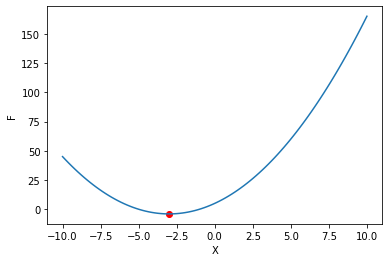

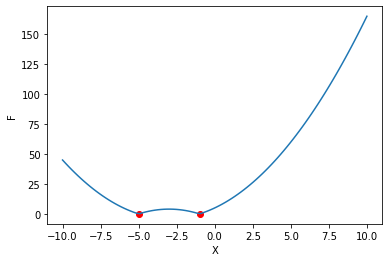

In [ ]:
import matplotlib.pyplot as plt

def show_first_plot():
  fig = plt.subplots()
  x = np.linspace(-10, 10,100)
  plt.plot(x, f(a, b)(x))
  plt.ylabel("F")
  plt.xlabel("X")
  plt.scatter(min_f, f(a, b)(min_f), c='#FF0000')
  plt.show()

def show_second_plot():
  fig = plt.subplots()
  x = np.linspace(-10, 10,100)
  plt.plot(x, g(a, b)(x))
  plt.ylabel("F")
  plt.xlabel("X")
  for val in min_g:
    plt.scatter(val, g(a, b)(val), c='#FF0000') 
  plt.show()

show_first_plot()
show_second_plot()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
def first_part():
  '''
  2^10 - общее количество комбинаций из орлов и решек, которые получаются из 10 монет, 2 варианта, удовлетворяющие нас - все орлы и все решки.
  p1 - вероятность того, что у одного человека выпало 10 монет одной стороной
  '''
  p1 = 2 / 2**10

  #q1 - вероятность того, что у одного человека не выпало 10 монет одной стороной
  q1 = 1 - p1

  #q1000 - вероятность того, что ни у одного человека не выпало 10 монет одной стороной
  q1000 = q1**1000

  #p1000 - вероятность того, что среди тысячи человек, хотя бы один получил комбинцаю из всех орлов или всех решек
  p1000 = 1 - q1000

  print("Result:", round(p1000, 6))

def second_part():
  '''
   p1 - вероятность того, что монетка 8 раз подряд выбрала одной стороной.
   2^10 - общее количество комбинаций из орлов и решек, которые получаются из 10 монет
   Посчитаем количество комбинцаций, которые удовлетворяют нас и все 8 монет орлы 
   (в силу симметрии, сможем провести аналогичные рассуждения для решек, поэтому сможем умножить полученное количество на 2).
   У нас может быть 8 орлов, 9 орлов и 10 орлов. 10 орлов - 1 вариант. 9 орлов - 2 варианта (решка вначале или решка в конце). 
   8 орлов - 5 вариантов (2 решки вначале, орел и решка вначале, 1 решка вначале и 1 в конце, две в конце решки в конце, решка и орел в конце)
  '''
  p1 = 2 * (5 + 2 + 1) / 2**10

  # q1 - вероятность того, что человеку не выпадет комбинация, удовлетворяющая условию
  q1 = 1 - p1

  #q1000 - вероятность того, что ни одному человеку не выпала комбинация монет, удовлетворяющая условию
  q1000 = q1**1000

  #p1000 - вероятность того, что хотя бы одному человеку выпала комбинация монет, удовлетворяющая условию
  p1000 = 1. - q1000

  print("Result:", round(p1000, 8))


# С из n по k
def C(n, k):
  result = 1
  for i in range(n - k + 1, n + 1):
    result *= i

  for i in range (1, k + 1):
    result /= i

  return result

def third_part():
  # Эти величины уже считали в первой части этого задания
  p1 = 2 / 2**10
  q1 = 1 - p1

 # Необходимо выбрать 3х челоывек, которые смогли получить требуемую комбинацию
  result = p1**3 * q1**997 * C(1000, 3)
  print("Result:", round(result, 5))

first_part()
second_part()
third_part()

Result: 0.85844
Result: 0.99999986
Result: 0.17629
